In [7]:
import os
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt


### 분석

In [9]:
os.chdir(r'C:\Users\jaij2\OneDrive\바탕 화면\논문\야구데이터\수비율\전처리\211117')
df_fin = pd.read_csv('2019_타자_수비점수(March, kWAR, AHP), 주성분(P1, P2, P3)_Scaled_SM_Scaled, 연차, 20연봉, FA.csv', encoding = 'cp949')
df_fin.index = df_fin['Name']
del df_fin['Name']
df_fin

,March_score,kWAR_score,AHP_score,P1,P2,P3,연차,20연봉,FA유무
Name,,,,,,,,,
이대호,293.568,0.000,3.229,0.430757,0.272024,-0.353360,19,250000,1
박병호,1802.460,0.000,19.827,6.306763,21.729561,-0.696118,15,200000,0
양의지,5769.280,721.160,266.829,7.044259,26.164837,-1.574577,14,200000,1
손아섭,2626.675,210.134,37.824,0.129430,1.146711,0.840859,13,200000,1
최형우,700.000,70.000,12.600,4.532162,15.243647,-1.266770,18,150000,1
김현수,2080.985,166.400,34.539,1.767736,5.360831,0.291364,14,130000,1
이재원,8278.032,1034.754,382.859,-2.301788,-8.764961,0.021842,14,130000,1
최정,4409.072,661.361,136.681,5.856531,19.862660,0.514829,15,120000,1
황재균,4123.564,602.866,127.589,1.691383,7.077431,1.576225,14,120000,1


In [10]:
## 표준화 하나마나 결과가 똑같음
sc_df_fin = pd.DataFrame(StandardScaler().fit_transform(df_fin))
sc_df_fin.columns = df_fin.columns
sc_df_fin

,March_score,kWAR_score,AHP_score,P1,P2,P3,연차,20연봉,FA유무
0,-1.525371,-1.387257,-1.001028,0.140953,0.007759,-0.322199,1.636855,3.382814,1.505545
1,-0.879489,-1.387257,-0.844114,2.063711,1.971460,-0.634730,0.730574,2.503303,-0.664211
2,0.818512,0.945804,1.490998,2.305036,2.377358,-1.435723,0.504003,2.503303,1.505545
3,-0.526683,-0.707442,-0.673974,0.042352,0.087807,0.766708,0.277433,2.503303,1.505545
4,-1.351398,-1.160796,-0.912437,1.483023,1.377898,-1.155059,1.410285,1.623792,1.505545
5,-0.760266,-0.848928,-0.705029,0.578442,0.473465,0.265670,0.504003,1.271988,1.505545
6,1.892385,1.960328,2.587924,-0.753195,-0.819266,0.019916,0.504003,1.271988,1.505545
7,0.236274,0.752345,0.260602,1.916385,1.800610,0.469429,0.730574,1.096086,1.505545
8,0.114062,0.563105,0.174648,0.553457,0.630561,1.437225,0.504003,1.096086,1.505545
9,1.265810,1.132184,0.983885,-0.377973,-0.344132,-0.937320,0.957144,0.128624,1.505545


In [11]:
sc_df_fin.index = df_fin.index
sc_df_fin['20연봉'] = np.log(df_fin['20연봉'])
sc_df_fin['FA유무'] = df_fin['FA유무']
sc_df_fin

,March_score,kWAR_score,AHP_score,P1,P2,P3,연차,20연봉,FA유무
Name,,,,,,,,,
이대호,-1.525371,-1.387257,-1.001028,0.140953,0.007759,-0.322199,1.636855,12.429216,1
박병호,-0.879489,-1.387257,-0.844114,2.063711,1.971460,-0.634730,0.730574,12.206073,0
양의지,0.818512,0.945804,1.490998,2.305036,2.377358,-1.435723,0.504003,12.206073,1
손아섭,-0.526683,-0.707442,-0.673974,0.042352,0.087807,0.766708,0.277433,12.206073,1
최형우,-1.351398,-1.160796,-0.912437,1.483023,1.377898,-1.155059,1.410285,11.918391,1
김현수,-0.760266,-0.848928,-0.705029,0.578442,0.473465,0.265670,0.504003,11.775290,1
이재원,1.892385,1.960328,2.587924,-0.753195,-0.819266,0.019916,0.504003,11.775290,1
최정,0.236274,0.752345,0.260602,1.916385,1.800610,0.469429,0.730574,11.695247,1
황재균,0.114062,0.563105,0.174648,0.553457,0.630561,1.437225,0.504003,11.695247,1


In [12]:
sc_df_fin.index = df_fin.index
df_fin['20연봉'] = np.log(df_fin['20연봉'])
df_fin['FA유무'] = df_fin['FA유무']
df_fin

,March_score,kWAR_score,AHP_score,P1,P2,P3,연차,20연봉,FA유무
Name,,,,,,,,,
이대호,293.568,0.000,3.229,0.430757,0.272024,-0.353360,19,12.429216,1
박병호,1802.460,0.000,19.827,6.306763,21.729561,-0.696118,15,12.206073,0
양의지,5769.280,721.160,266.829,7.044259,26.164837,-1.574577,14,12.206073,1
손아섭,2626.675,210.134,37.824,0.129430,1.146711,0.840859,13,12.206073,1
최형우,700.000,70.000,12.600,4.532162,15.243647,-1.266770,18,11.918391,1
김현수,2080.985,166.400,34.539,1.767736,5.360831,0.291364,14,11.775290,1
이재원,8278.032,1034.754,382.859,-2.301788,-8.764961,0.021842,14,11.775290,1
최정,4409.072,661.361,136.681,5.856531,19.862660,0.514829,15,11.695247,1
황재균,4123.564,602.866,127.589,1.691383,7.077431,1.576225,14,11.695247,1


In [36]:
os.chdir(r'C:\Users\jaij2\OneDrive\바탕 화면\논문\야구데이터\수비율\전처리\PLS')
df_fin.to_csv('PLS_2019_타자_수비점수(March, kWAR, AHP), 주성분(GEN, POW, SPD)_Scaled_SM, 연차, FA, 20연봉 - 로그.csv', encoding = 'cp949')

#### 수비점수 kWAR

In [15]:
x = df_fin.drop(['March_score', 'AHP_score', '20연봉'], axis = 1)
#y = np.log(np.log(sc_df_fin['20연봉']))   ## 로그 3번
#y = np.log(sc_df_fin['20연봉'])           ## 로그 2번
y = sc_df_fin['20연봉']                    ## 로그 1번

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

LR = LinearRegression()
LR.fit(x_train, y_train)

y_prediction = LR.predict(x_test)
print(y_prediction)
print('r2score = ', r2_score(y_test, y_prediction))
print('mse = ', mean_squared_error(y_test,y_prediction))
print('rmse = ', np.sqrt(mean_squared_error(y_test,y_prediction)))
## adjusted R2 score
r2 = r2_score(y_test, y_prediction)
n = len(x)   ## 관측값의 개수
k = len(x.columns)   ## 독립변수의 개수
ar2 = 1 - ((1 - r2) * (n - 1) / (n - k - 1))
print('adjustedr2 = ', ar2)

[10.57046647  9.69980604  9.42723651  9.93873769 11.27786863 10.4368036
 10.19389212 10.31192513 10.33457925 11.1466663 ]
r2score =  0.7173993817023105
mse =  0.11340013518676831
rmse =  0.3367493655328371
adjustedr2 =  0.6770278648026407


In [24]:
x.columns

Index(['kWAR_score', 'P1', 'P2', 'P3', '연차', 'FA유무'], dtype='object')

In [27]:
LR.coef_

array([ 4.02100528e-04,  9.01723008e-01, -2.94919974e-01,  2.95284548e-01,
        8.32462198e-02,  3.78559900e-01])

In [12]:
LR.score(x, y)

0.7111574368842446

In [233]:
y_prediction_2 = LR.predict(x)

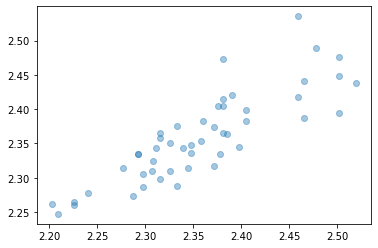

In [234]:
plt.scatter(y, y_prediction_2, alpha=0.4)

#### 수비점수 March

In [18]:
x = df_fin.drop(['kWAR_score', 'AHP_score', '20연봉'], axis = 1)
y = df_fin['20연봉']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

LR = LinearRegression()
LR.fit(x_train, y_train)

y_prediction = LR.predict(x_test)
print(y_prediction)
print('r2score = ', r2_score(y_test, y_prediction))
print('mse = ', mean_squared_error(y_test,y_prediction))
print('rmse = ', np.sqrt(mean_squared_error(y_test,y_prediction)))
## adjusted R2 score
r2 = r2_score(y_test, y_prediction)
n = len(x)   ## 관측값의 개수
k = len(x.columns)   ## 독립변수의 개수
ar2 = 1 - ((1 - r2) * (n - 1) / (n - k - 1))
print('adjustedr2 = ', ar2)

[10.6207966   9.67072104  9.37492107  9.99836769 11.27192073 10.4301536
 10.17582727 10.30299651 10.32109475 11.21021119]
r2score =  0.7066710932126368
mse =  0.11770511290543033
rmse =  0.34308178748722634
adjustedr2 =  0.6647669636715849


#### March 수비점수만 회귀분석 --> 쓰레기

In [11]:
x = sc_df_fin.drop(['kWAR_score', 'AHP_score', '20연봉', '연차', 'P1', 'P2', 'P3'], axis = 1)
y = sc_df_fin['20연봉']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

LR = LinearRegression()
LR.fit(x_train, y_train)

y_prediction = LR.predict(x_test)
print(y_prediction)
print('r2score = ', r2_score(y_test, y_prediction))
print('mse = ', mean_squared_error(y_test,y_prediction))
print('rmse = ', np.sqrt(mean_squared_error(y_test,y_prediction)))
## adjusted R2 score
r2 = r2_score(y_test, y_prediction)
n = len(x)   ## 관측값의 개수
k = len(x.columns)   ## 독립변수의 개수
ar2 = 1 - ((1 - r2) * (n - 1) / (n - k - 1))
print('adjustedr2 = ', ar2)

[10.26922532 10.26232538 10.40411103 10.20793174 10.39389317 10.39883391
 10.34688834 10.37399766 10.40031198 10.40333712]
r2score =  -0.010691769971804987
mse =  0.4055638095817072
rmse =  0.6368389196505716
adjustedr2 =  -0.054634890405361736


#### AHP_score

In [19]:
x = df_fin.drop(['kWAR_score', '20연봉', 'March_score'], axis = 1)
y = df_fin['20연봉']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

LR = LinearRegression()
LR.fit(x_train, y_train)

y_prediction = LR.predict(x_test)
print(y_prediction)
print('r2score = ', r2_score(y_test, y_prediction))
print('mse = ', mean_squared_error(y_test,y_prediction))
print('rmse = ', np.sqrt(mean_squared_error(y_test,y_prediction)))
## adjusted R2 score
r2 = r2_score(y_test, y_prediction)
n = len(x)   ## 관측값의 개수
k = len(x.columns)   ## 독립변수의 개수
ar2 = 1 - ((1 - r2) * (n - 1) / (n - k - 1))
print('adjustedr2 = ', ar2)

[10.5027699   9.6859004   9.40059949  9.92211382 11.28776847 10.41581744
 10.14124179 10.28060948 10.35517316 11.1755486 ]
r2score =  0.6998731298925234
mse =  0.12043295534306966
rmse =  0.34703451606874736
adjustedr2 =  0.6569978627343125


#### 수비점수 3개 다 넣어서

In [30]:
x = sc_df_fin.drop(['20연봉'], axis = 1)
y = np.log(df_fin['20연봉'])

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

LR = LinearRegression()
LR.fit(x_train, y_train)

y_prediction = LR.predict(x_test)
print(y_prediction)
print('r2score = ', r2_score(y_test, y_prediction))
print('mse = ', mean_squared_error(y_test,y_prediction))
print('rmse = ', np.sqrt(mean_squared_error(y_test,y_prediction)))
## adjusted R2 score
r2 = r2_score(y_test, y_prediction)
n = len(x)   ## 관측값의 개수
k = len(x.columns)   ## 독립변수의 개수
ar2 = 1 - ((1 - r2) * (n - 1) / (n - k - 1))
print('adjustedr2 = ', ar2)

[10.63937628  9.31584407  9.32791674  9.805732   11.07472213 10.46865043
  9.94369736 10.35207673 10.207459   11.46922547]
r2score =  0.7244514616361182
mse =  0.11057032248975832
rmse =  0.3325211609653712
adjustedr2 =  0.6693417539633418


### 그래프

In [57]:
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab


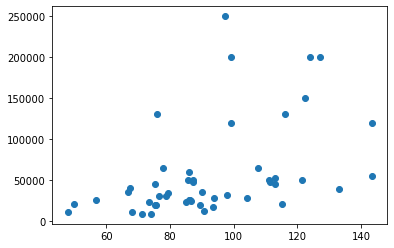

In [60]:
plt.scatter(df_fin['GEN'], df_fin['20연봉'])

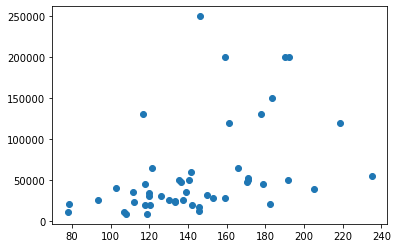

In [61]:
plt.scatter(df_fin['POW'], df_fin['20연봉'])

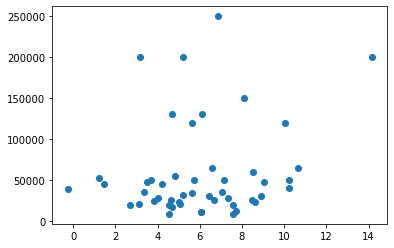

In [62]:
plt.scatter(df_fin['SPD'], df_fin['20연봉'])

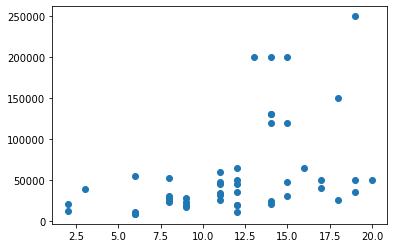

In [67]:
pylab.scatter(df_fin['연차'], df_fin['20연봉'])